# Exponential Moving Average (EMA)

https://www.investopedia.com/terms/e/ema.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'SBIN.NS'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,334.700012,335.950012,332.149994,334.450012,326.298187,17379320
2020-01-02 00:00:00+05:30,334.500000,339.850006,333.350006,339.299988,331.029938,20324236
2020-01-03 00:00:00+05:30,337.950012,337.950012,332.000000,333.700012,325.566467,21853208
2020-01-06 00:00:00+05:30,331.700012,331.700012,317.700012,319.000000,311.224731,35645325
2020-01-07 00:00:00+05:30,324.450012,327.000000,315.399994,318.399994,310.639374,50966826


In [3]:
n = 15
df['EMA'] = df['Adj Close'].ewm(ignore_na=False,span=n,min_periods=n,adjust=True).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


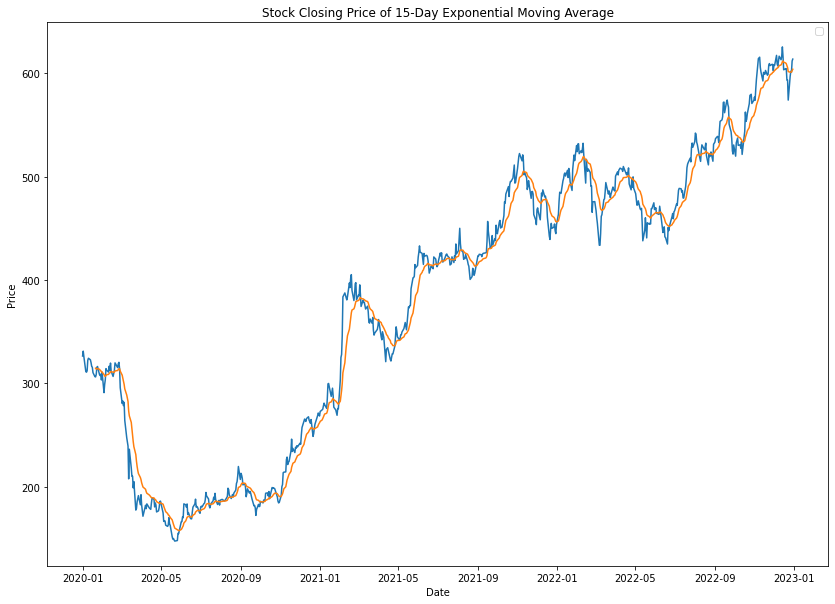

In [4]:
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.plot(df['EMA'])
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock Closing Price of ' + str(n) + '-Day Exponential Moving Average')
plt.legend(loc='best')

## Candlestick with EMA

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA,VolumePositive
0,18261.770833,334.700012,335.950012,332.149994,334.450012,326.298187,17379320,NaN,False
1,18262.770833,334.500000,339.850006,333.350006,339.299988,331.029938,20324236,NaN,False
2,18263.770833,337.950012,337.950012,332.000000,333.700012,325.566467,21853208,NaN,False
3,18266.770833,331.700012,331.700012,317.700012,319.000000,311.224731,35645325,NaN,False
4,18267.770833,324.450012,327.000000,315.399994,318.399994,310.639374,50966826,NaN,False


Text(0.5, 0, 'Date')

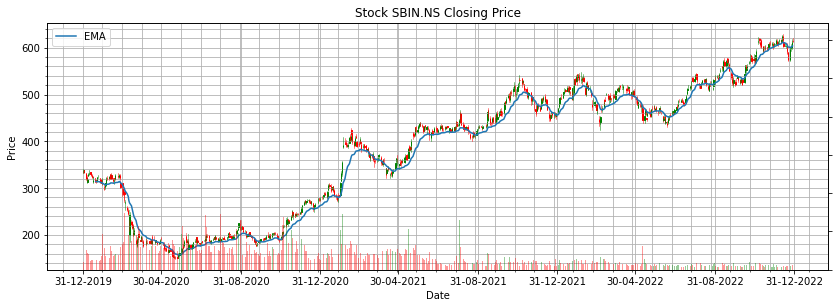

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['EMA'], label='EMA')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')